# Fusing

In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization

In [22]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Imports

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as mn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error


In [0]:
import keras
from keras import Sequential
from keras.layers import SimpleRNN
from keras import models
from keras import layers
from keras.layers import Conv1D,MaxPooling1D,GlobalAveragePooling1D,Dropout,Dense,BatchNormalization

In [25]:
!ls drive/My\ Drive

'Colab Notebooks'	     MatlabResults
 Figures		     Models
 HH_ag.csv		     para_comb_20p_sample.csv
 HH_paramter_space_40s.csv   PR_ag.csv
 HH_voltage_40s.csv	     voltages_AP_30sek_sample.csv


In [26]:
%%time
Y_df = pd.read_csv("drive/My Drive/HH_paramter_space_40s.csv",index_col=0)
X_df = pd.read_csv("drive/My Drive/HH_voltage_40s.csv",index_col=0)

names = ['gbar_Na','gbar_L','E_L','Cm','gbar_K','E_Na','E_K']
Y_df.columns = names
X_df = X_df[X_df.columns[:1201]]
#names = X_df.columns

CPU times: user 1.17 s, sys: 92.6 ms, total: 1.27 s
Wall time: 1.32 s


In [27]:
X_df.describe()

,0.0,0.025,0.05,0.075,0.1,0.125,0.15,0.175,0.2,0.225,...,29.775,29.8,29.825,29.85,29.875,29.9,29.925,29.95,29.975,30.0
count,2187.0,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,...,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000
mean,-65.0,-61.230814,-57.522917,-53.871213,-50.268943,-46.705747,-43.164905,-39.619476,-36.027222,-32.324521,...,-44.055501,-43.956326,-43.856491,-43.756043,-43.655027,-43.553491,-43.451482,-43.349050,-43.246243,-43.143115
std,0.0,0.450409,0.886689,1.310392,1.723821,2.130920,2.538633,2.958860,3.411033,3.925079,...,7.105584,7.108816,7.112726,7.117323,7.122617,7.128617,7.135329,7.142746,7.150854,7.159628
min,-65.0,-62.049944,-59.136773,-56.258093,-53.410930,-50.591022,-47.791895,-45.003606,-42.211074,-39.391939,...,-66.808361,-66.668915,-66.517970,-66.357156,-66.187893,-66.011411,-65.828780,-65.640926,-65.448654,-65.252664
25%,-65.0,-61.618299,-58.286152,-55.000671,-51.749738,-48.532330,-45.335168,-42.146216,-38.943036,-35.678339,...,-48.063150,-47.961029,-47.835071,-47.733938,-47.626199,-47.513937,-47.420495,-47.360213,-47.272328,-47.185651
50%,-65.0,-61.279008,-57.619543,-54.011337,-50.453810,-46.932706,-43.434466,-39.934772,-36.397856,-32.760893,...,-42.928086,-42.827699,-42.753323,-42.683261,-42.628159,-42.547158,-42.419177,-42.349658,-42.256717,-42.150291
75%,-65.0,-60.856883,-56.789430,-52.788652,-48.833152,-44.915554,-41.048193,-37.179856,-33.230435,-29.139874,...,-39.390278,-39.329701,-39.302353,-39.240803,-39.210072,-39.182964,-39.171872,-39.138753,-39.104779,-39.070245
max,-65.0,-60.128840,-55.364089,-50.696022,-46.111323,-41.588717,-37.092570,-32.557096,-27.813805,-22.772605,...,-9.309760,-8.615307,-8.047462,-7.609334,-7.301385,-7.121672,-7.066176,-7.129197,-7.303753,-7.581980


# Split into training and testing data

In [0]:
X = X_df.values
Y = Y_df.values

X_Train, X_test, y_Train, y_test = train_test_split(X,Y,test_size=0.2,random_state=111)


# Standardizes the data

In [0]:


scx = StandardScaler()
scy = StandardScaler()


X_Train = scx.fit_transform(X_Train)
y_Train = scy.fit_transform(y_Train)

X_test = scx.transform(X_test)
y_test = scy.transform(y_test)

# Validation split

In [0]:
X_train, X_val, y_train, y_val = train_test_split(X_Train,y_Train,test_size=0.2,random_state=1234)

In [31]:
X_train.reshape(X_train.shape[0],X_train.shape[1],1).shape

(1399, 1201, 1)

## Model train

In [45]:

model1 = Sequential()
model1.add(Conv1D(64, 3,padding='same', activation='relu', input_shape=(X_test.shape[1], 1)))
model1.add(Conv1D(64, 3,padding='same', activation='relu'))
model1.add(MaxPooling1D(3))
model1.add(Conv1D(128, 3,padding='same', activation='relu'))
model1.add(Conv1D(128, 3,padding='same', activation='relu'))
model1.add(GlobalAveragePooling1D())
model1.add(Dropout(0.3))
model1.add(Dense(7, activation='tanh'))
print(model1.summary())
model1.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_17 (Conv1D)           (None, 1201, 64)          256       
_________________________________________________________________
conv1d_18 (Conv1D)           (None, 1201, 64)          12352     
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 400, 64)           0         
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 400, 128)          24704     
_________________________________________________________________
conv1d_20 (Conv1D)           (None, 400, 128)          49280     
_________________________________________________________________
global_average_pooling1d_5 ( (None, 128)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
__________

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
plot_model(model1, to_file="drive/My Drive/Figures/models/HHinverse_arch.png", show_shapes=True, show_layer_names=True)

In [47]:
%%time
history1 = model1.fit(X_train.reshape(X_train.shape[0],X_train.shape[1],1), y_train,
                  epochs=2000,
                  batch_size=128,
                  verbose=1,
                  validation_data=(X_val.reshape(X_val.shape[0],X_val.shape[1],1), y_val))

Train on 1399 samples, validate on 350 samples
Epoch 1/2000
1399/1399 [==============================] - 1s 777us/step - loss: 0.9690 - acc: 0.1644 - val_loss: 0.9076 - val_acc: 0.2200
Epoch 2/2000
1399/1399 [==============================] - 0s 206us/step - loss: 0.9028 - acc: 0.2359 - val_loss: 0.8461 - val_acc: 0.3114
Epoch 3/2000
1399/1399 [==============================] - 0s 209us/step - loss: 0.8878 - acc: 0.2680 - val_loss: 0.8509 - val_acc: 0.3057
Epoch 4/2000
1399/1399 [==============================] - 0s 210us/step - loss: 0.8724 - acc: 0.2630 - val_loss: 0.8391 - val_acc: 0.3171
Epoch 5/2000
1399/1399 [==============================] - 0s 210us/step - loss: 0.8659 - acc: 0.2723 - val_loss: 0.8317 - val_acc: 0.3257
Epoch 6/2000
1399/1399 [==============================] - 0s 206us/step - loss: 0.8581 - acc: 0.2666 - val_loss: 0.8232 - val_acc: 0.3257
Epoch 7/2000
1399/1399 [==============================] - 0s 206us/step - loss: 0.8565 - acc: 0.2752 - val_loss: 0.8201 - val

(0.2, 0.8)

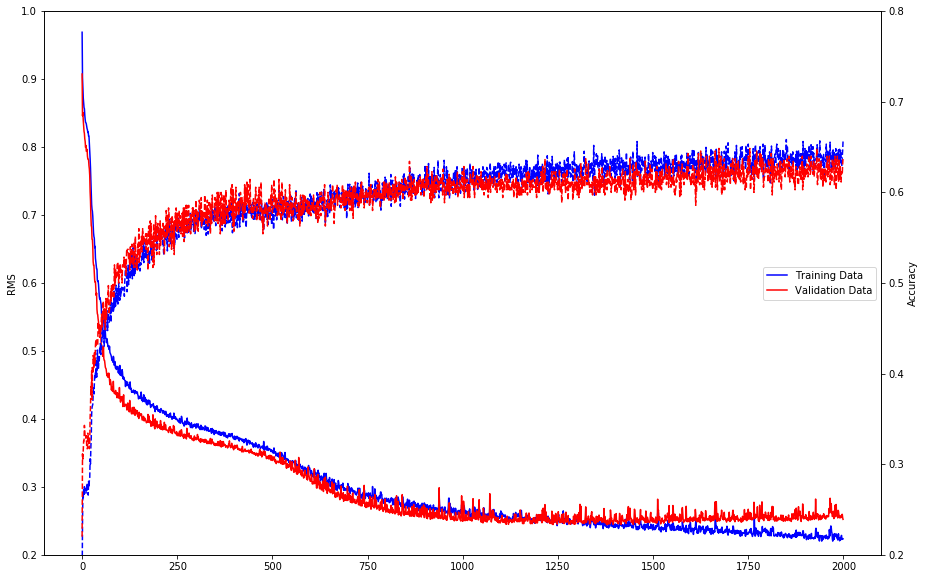

In [48]:
plt.figure(figsize=(15,10))
ax = plt.gca()
ax.plot(history1.history['loss'],label='Training Data',c='blue')
ax.plot(history1.history['val_loss'],label='Validation Data',c='red')
plt.ylabel('RMS')
plt.legend(loc='center right')
plt.ylim(0.2,1)

ax2 = ax.twinx()
ax2.plot(history1.history['acc'],'--',c='blue')
ax2.plot(history1.history['val_acc'],'--',c='red')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.ylim(0.2,0.8)
#plt.savefig("drive/My Drive/Figures/R2plots/HHCNN_inverse_training2")

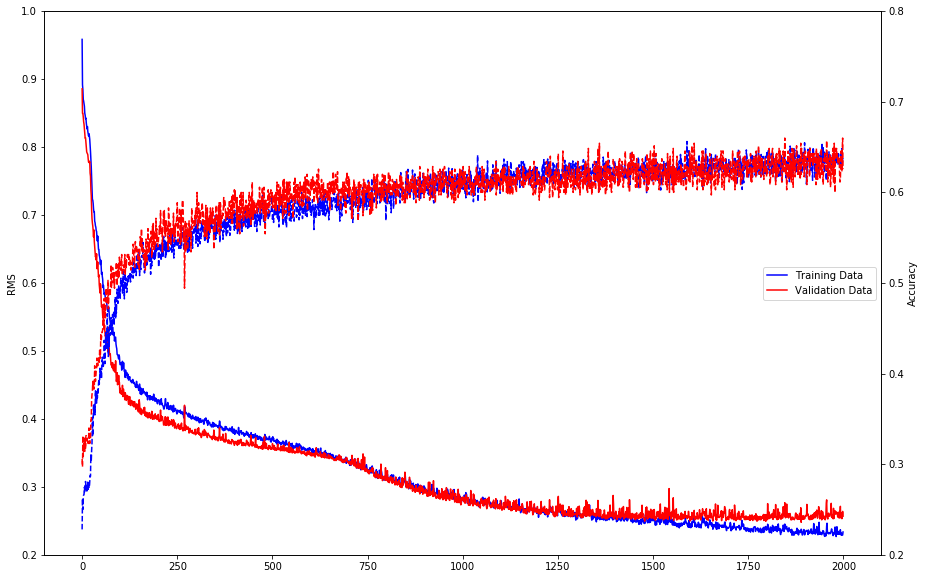

In [0]:
plt.figure(figsize=(15,10))
ax = plt.gca()
ax.plot(history1.history['loss'],label='Training Data',c='blue')
ax.plot(history1.history['val_loss'],label='Validation Data',c='red')
plt.ylabel('RMS')
plt.legend(loc='center right')
plt.ylim(0.2,1)

ax2 = ax.twinx()
ax2.plot(history1.history['acc'],'--',c='blue')
ax2.plot(history1.history['val_acc'],'--',c='red')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.ylim(0.2,0.8)
plt.savefig("drive/My Drive/Figures/R2plots/HHCNN_inverse_training2")

# model Test

In [0]:
X = X_df.values
Y = Y_df.values

X_Train, X_test, y_Train, y_test = train_test_split(X,Y,test_size=0.2,random_state=111)


scx = StandardScaler()
scy = StandardScaler()


X_train = scx.fit_transform(X_Train)
y_train = scy.fit_transform(y_Train)

X_test = scx.transform(X_test)
y_test = scy.transform(y_test)

In [56]:

model3 = Sequential()
model3.add(Conv1D(64, 3,padding='same', activation='relu', input_shape=(X_test.shape[1], 1)))
model3.add(Conv1D(64, 3,padding='same', activation='relu'))
model3.add(MaxPooling1D(3))
model3.add(Conv1D(128, 3,padding='same', activation='relu'))
model3.add(Conv1D(128, 3,padding='same', activation='relu'))
model3.add(GlobalAveragePooling1D())
model3.add(Dropout(0.3))
model3.add(Dense(7, activation='tanh'))
print(model3.summary())
model3.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_29 (Conv1D)           (None, 1201, 64)          256       
_________________________________________________________________
conv1d_30 (Conv1D)           (None, 1201, 64)          12352     
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 400, 64)           0         
_________________________________________________________________
conv1d_31 (Conv1D)           (None, 400, 128)          24704     
_________________________________________________________________
conv1d_32 (Conv1D)           (None, 400, 128)          49280     
_________________________________________________________________
global_average_pooling1d_8 ( (None, 128)               0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
__________

In [58]:
%%time
history3 = model3.fit(X_train.reshape(X_train.shape[0],X_train.shape[1],1), y_train,
                  epochs=1250,
                  batch_size=128,
                  verbose=0)

CPU times: user 3min 53s, sys: 1min 42s, total: 5min 35s
Wall time: 6min 41s


In [60]:
results_df = pd.DataFrame()
ypred3 = model3.predict(X_test.reshape(X_test.shape[0],X_test.shape[1],1))

extra_results_df = pd.DataFrame([r2_score(y_test[:,i],ypred3[:,i]) for i in range(len(names))],index=names,columns=['model3_1250'])
results_df = pd.concat([results_df,extra_results_df],axis=1)
results_df

,model3_1250
gbar_Na,0.883438
gbar_L,0.819921
E_L,0.043293
Cm,0.915268
gbar_K,0.875253
E_Na,0.910366
E_K,0.914636
